#### Este Notebook versa sobre Dividir_Conquistar para resolver desafio de se encontrar a maxima soma (subsequente) em um array.

In [120]:
# Importação de Bibliotecas
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
import time
import psutil
import os

In [122]:
# Definição de Parâmetros Técnicos
NN = 250 # comprimento máximo dos arrays a serem testados
N = 10 # comprimento do array_exemplo
array = np.random.randint(-10,10,N)
print(array)

[ 3 -2 -9 -2  6 -9 -9 -9  1  6]


#### Função Dividir_Conquistar

In [123]:
# Passo 01 - com referencia intermediaria
def max_divconq_soma(arr, left, mid, right):
    # resolver lado esquerdo do array
    left_sum = float('-inf')
    total_sum = 0
    for i in range(mid, left - 1, -1):
        total_sum += arr[i]
        left_sum = max(left_sum, total_sum)

    # resolver ladod direito do array
    right_sum = float('-inf')
    total_sum = 0
    for i in range(mid + 1, right + 1,1):
        total_sum += arr[i]
        right_sum = max(right_sum, total_sum)

    # Somar as solucoes esquera e direita
    return left_sum + right_sum

In [131]:
arr = [-2, 1, -3, 2, -1, -5, 1, -8, 4]
mid = len(arr) // 2
result = max_divconq_soma(arr, 0,mid,len(arr) - 1)
print("Max_soma_DivConq:", result)

Max_soma_DivConq: -3


In [125]:
# Passo 2 = definindo a referencia como o meio e usando recursao
def max_soma_divconq(arr, left, right):
    # Caso_basico_unico_elemento_no_array
    if left == right:
        return arr[left]

    # achar a posicao do intermediaria
    mid = (left + right) // 2

    # Resolver lado direito e esquerdo com rescursao
    left_max = max_soma_divconq(arr, left, mid)
    right_max = max_soma_divconq(arr, mid + 1, right)

    # Resolver para o array inteiro
    cross_max = max_divconq_soma(arr, left, mid, right)

    # print('left_max =',left_max)
    # print('right_max =',right_max)
    # print('cross_max =',cross_max)

    # Comparar lado direito, lado esquerdo e todo o array
    return max(left_max, right_max, cross_max)

In [126]:
# Exemplo de uso
arr = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
result = max_soma_divconq(arr, 0, len(arr) - 1)
print("Max_soma_DivConq:", result)

Max_soma_DivConq: 6


#### Exploracao da dificuldade computacional

In [127]:
dificult = pd.DataFrame() # dataframe auxiliar
tempo = pd.Series() # estrutura de dados auxliar
tamanho = pd.Series() # estrutura de dados auxiliar
memoria = pd.Series() # estrutura de dados auxiliar
for n in range (2,NN): # comecar com array de 2 elementos no minimo e no maximo NN
  array = np.random.randint(-10,10,n)
  start = time.time()
  proc = psutil.Process(os.getpid())
  start_memory = proc.memory_info().rss
  result = max_soma_divconq(array,0,len(array)-1)
  stop = time.time()
  end_memory = proc.memory_info().rss
  sprint = stop - start
  memo_used = (end_memory - start_memory) *1024
  sprint = (round(sprint,6)) *1000
  tamanho = np.append(tamanho,n)
  tempo = np.append(tempo,sprint)
  memoria = np.append(memoria,memo_used)
dificult['tamanho'] = tamanho
dificult['Tempo_execucao'] = tempo
dificult['Memoria_usada'] = memoria

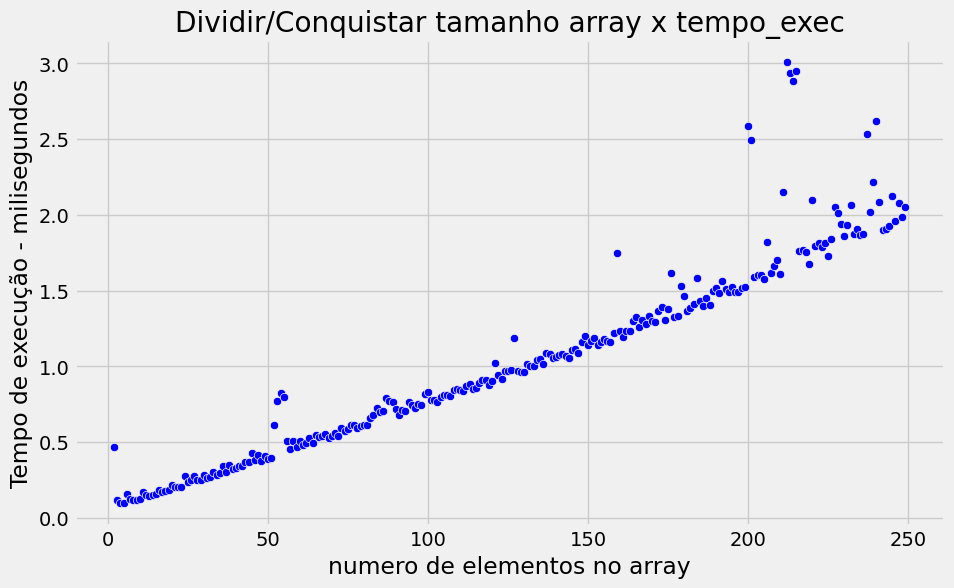

In [128]:
plt.figure(figsize=(10,6)) # definição do tamanho da figura
plt.style.use('fivethirtyeight') # estilo de impressao = melhorar visualizacao
sns.scatterplot(data = dificult, x = 'tamanho', y = 'Tempo_execucao', color = 'blue') # grafico com os pontos
plt.xlabel('numero de elementos no array')
plt.ylabel('Tempo de execução - milisegundos')
plt.title('Dividir/Conquistar tamanho array x tempo_exec')
plt.grid(True)
plt.show()

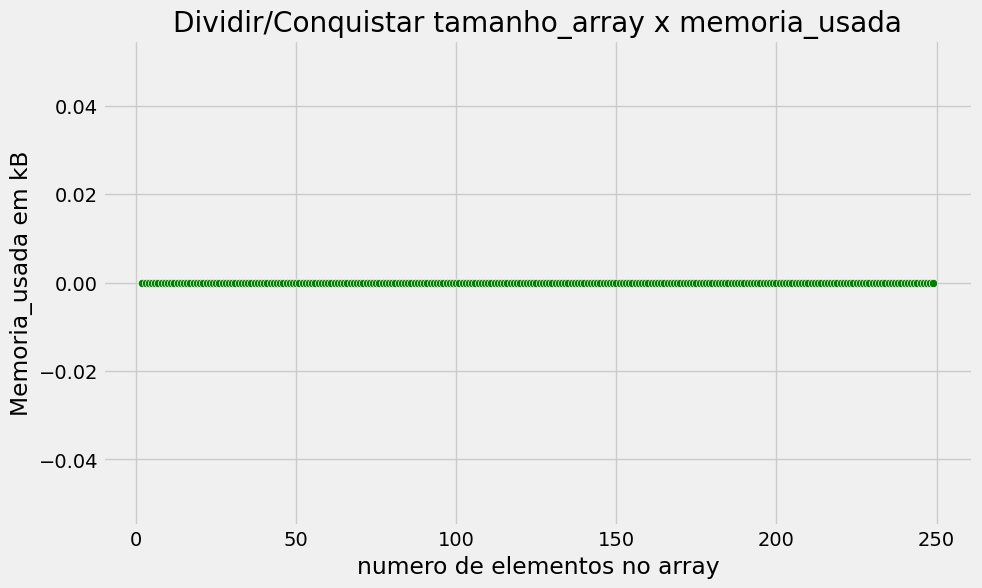

In [129]:
plt.figure(figsize=(10,6)) # definição do tamanho da figura
plt.style.use('fivethirtyeight') # estilo de impressao = melhorar visualizacao
sns.scatterplot(data = dificult, x = 'tamanho', y = 'Memoria_usada', color = 'green') # grafico com os pontos
plt.xlabel('numero de elementos no array')
plt.ylabel('Memoria_usada em kB')
plt.title('Dividir/Conquistar tamanho_array x memoria_usada')
plt.grid(True)
plt.show()